In [243]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [244]:
#Load the Dataset
df = pd.read_csv('/content/tested.csv')

#Exploring the Dataset

In [245]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [247]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [248]:
df.duplicated().sum()

0

In [249]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

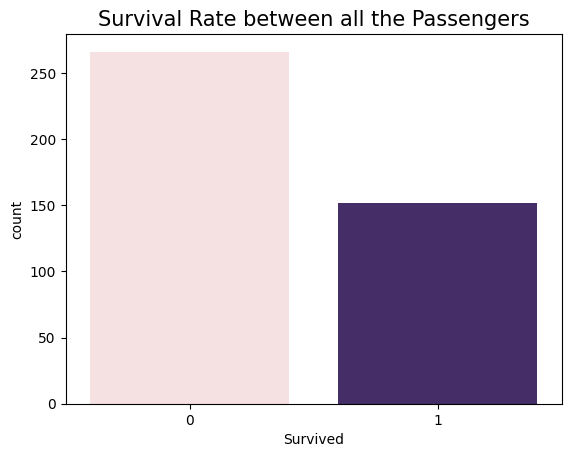

In [250]:
sns.countplot(x=df["Survived"], palette=["#F9DEDF","#432371"])
plt.title("Survival Rate between all the Passengers", fontsize=15)
plt.show()

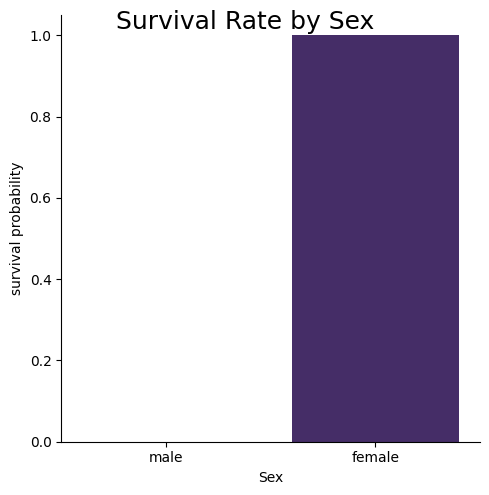

In [251]:
g = sns.catplot(
        x="Sex",
        y="Survived",
        data=df,
        kind="bar",
        palette=["#F9DEDF","#432371"])

g.set_ylabels("survival probability")
g.fig.suptitle('Survival Rate by Sex', size= 18);

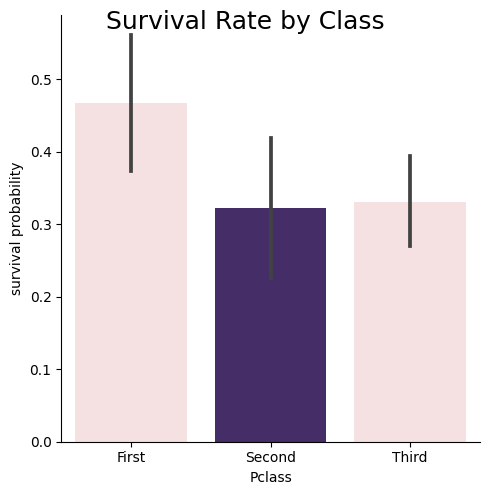

In [252]:
g = sns.catplot(
        x="Pclass",
        y="Survived",
        data=df,
        kind="bar",
        palette=["#F9DEDF","#432371"])

g.set_ylabels("survival probability")
g.fig.suptitle('Survival Rate by Class', size= 18)
g.set(xticklabels=["First", "Second", "Third"]);

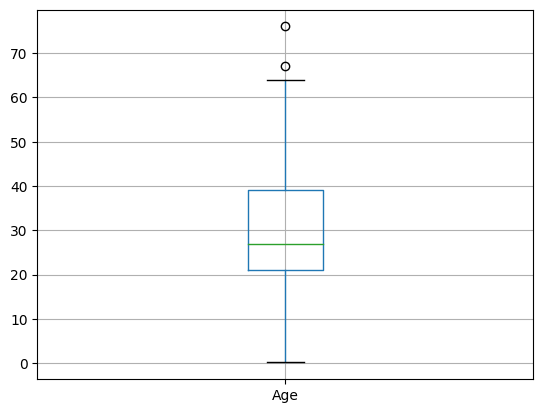

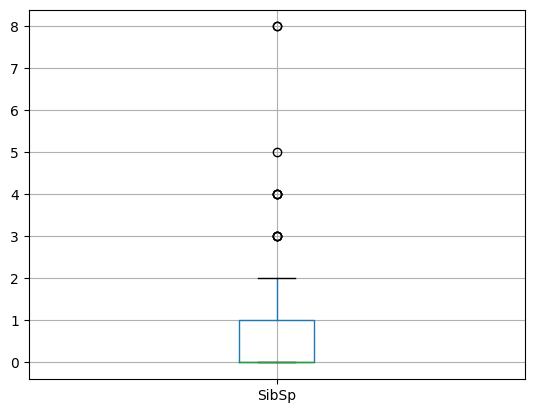

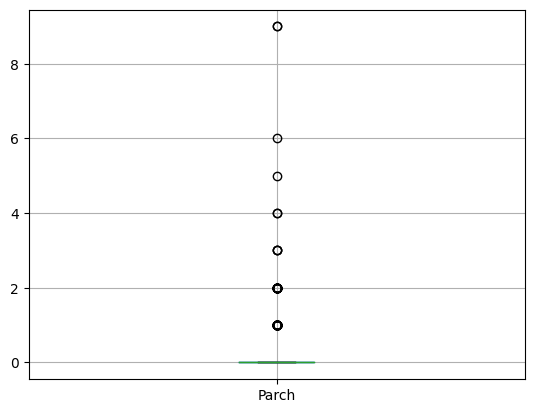

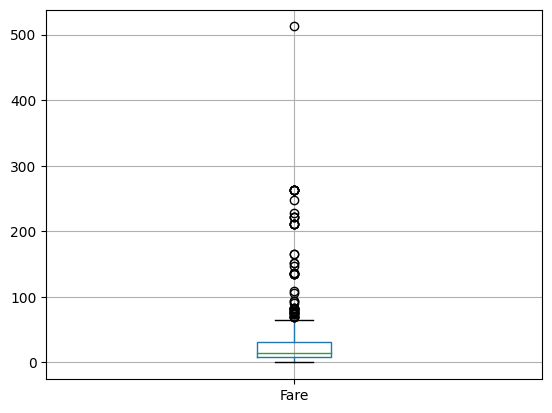

In [253]:
col = ['Age', 'SibSp', 'Parch', 'Fare']
for i in col:
  plt.figure()
  df.boxplot(i)
  plt.show()

#Preparing the DataSet

In [254]:
# Fill missing values in 'Age' column with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing values in 'Fare' column with mean
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

# Deleting Cabin column
df = df.drop(['Cabin'], axis=1)

In [255]:
# Convert categorical columns to numerical using LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [256]:
# Feature Selection
# Deleting Embarked column
df = df.drop(['Embarked'], axis=1)

# Deleting Ticket column
df = df.drop(['Ticket'], axis=1)

# Deleting Name column
df = df.drop(['Name'], axis=1)

# Deleting PassengerId column
df = df.drop(['PassengerId'], axis=1)

In [257]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,34.5,0,0,7.8292
1,1,3,0,47.0,1,0,7.0000
2,0,2,1,62.0,0,0,9.6875
3,0,3,1,27.0,0,0,8.6625
4,1,3,0,22.0,1,1,12.2875


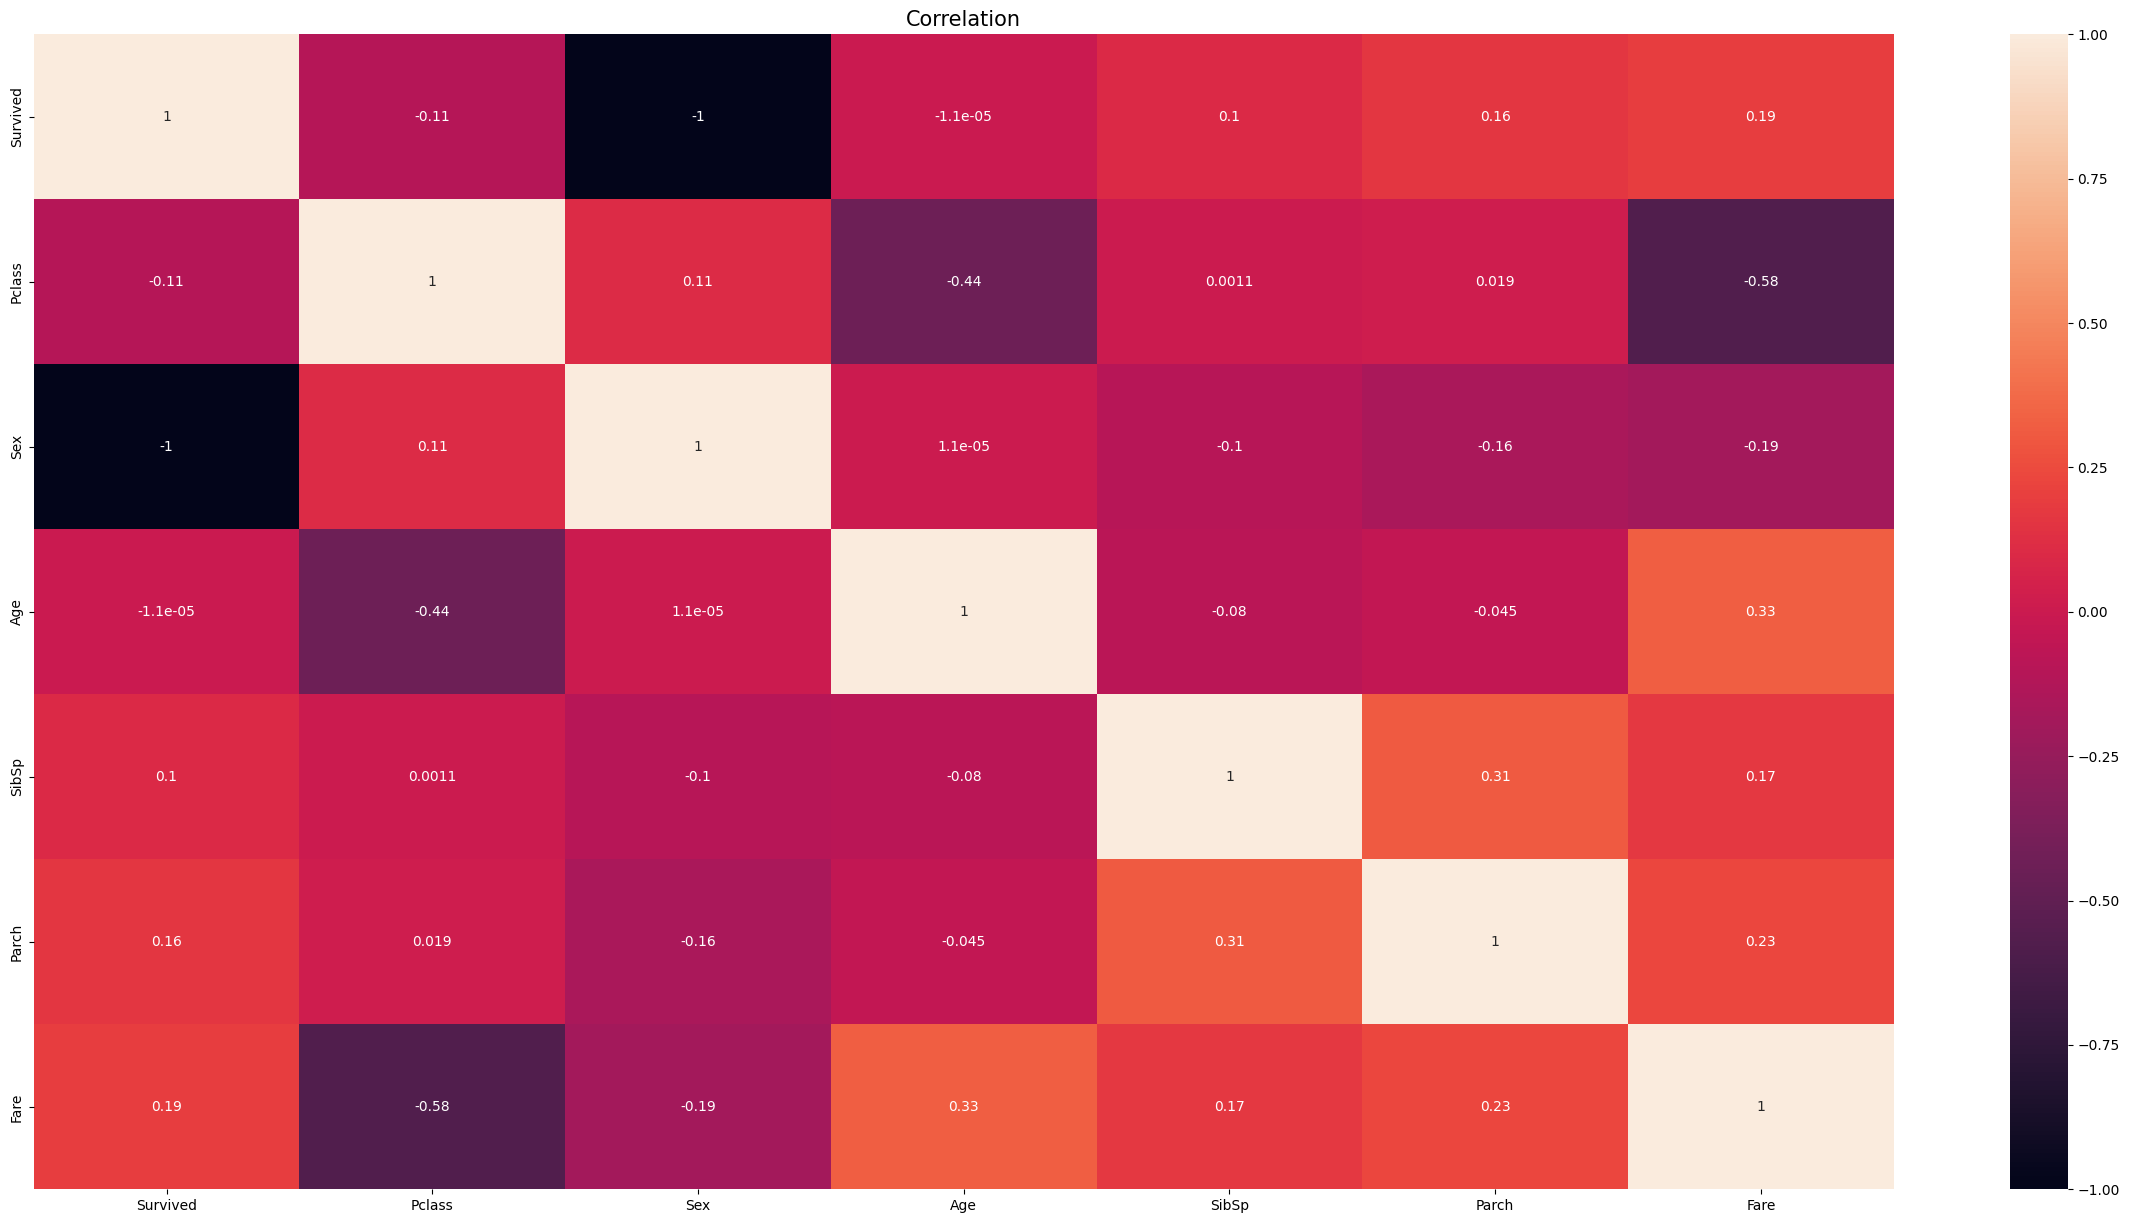

In [258]:
#checking for multicollinearity
corr = df.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr,annot=True)
plt.title("Correlation", fontsize=15)
plt.show()

#Modeling

In [259]:
# splitting data
y = df['Survived']
x = df.drop(columns='Survived', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=30, test_size=0.2)

In [260]:
# LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# Evaluation
cr=classification_report(Y_test, y_pred)
print(cr)

cm = confusion_matrix(Y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

[[53  0]
 [ 0 31]]


In [261]:
# DecisionTree
DecTree = tree.DecisionTreeClassifier(random_state = 0)
DecTree.fit(X_train, Y_train)
y_pred = DecTree.predict(X_test)

# Evaluation
cr=classification_report(Y_test, y_pred)
print(cr)

print("Confusion Matrix")
cm = confusion_matrix(Y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix
[[53  0]
 [ 0 31]]
